```python
Author: Josh Stine
Created: 9/8/2021
```
# Iris Dataset Analysis

### This is an analysis on the Iris Dataset which is a popular training/test dataset used in Machine Learning/Data Science.

<br>

References:
<ul>
    <li><a href="https://archive.ics.uci.edu/ml/datasets/iris" target="_blank">https://archive.ics.uci.edu/ml/datasets/iris</a></li>
    <li><a href="https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html" target="_blank">https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html</a></li>
</ul>

### Here we are loading in the data and translating the numeric class/species column to the actual species name to make visualizations easier to understand

In [207]:
# Author: Josh Stine
# Created: 6/26/2021

import matplotlib.pyplot as plt
import numpy as np
import pandas
from scipy import stats
import seaborn
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier


# load iris dataset to a pandas dataframe
iris = load_iris()
iris_data = pandas.DataFrame(data=iris.data, columns=iris.feature_names)
iris_data['class'] = iris.target

# translate class to species name
species_names = []
for index, record in enumerate(iris_data['class']):
    if iris_data['class'][index] == 0:
        species_names.append('setosa')
    elif iris_data['class'][index] == 1:
        species_names.append('versicolor')
    elif iris_data['class'][index] == 2:
        species_names.append('virginica')
iris_data['species'] = species_names
iris_data.drop('class', inplace=True, axis=1)

## Getting to know the data
### Here we are looking at the basic stats (min, max, mean, standard dev, trimmed mean, skewness, and kurtosis) for the whole data set, then we split the data into subsets based on species/class and look at the stats for each.

In [225]:
def get_stats(dataframe, target_label, threshold=0.04):
    """
    Parameters
    ----------
    dataframe: pandas dataframe
    target_label: target column with classification label
    threshold: value between 0 and 1 used for trimmed mean; will trim % off both ends

    Returns
    -------
    dataframe with min, max, mean, std dev, trimmed mean, skewness, and kurtosis of input dataset
    """

    # slim dataframe to just features with numeric data
    features = pandas.DataFrame(dataframe)
    features.drop(target_label, inplace=True, axis=1)
    feature_names = list(features.columns)

    # get min, max, mean, std dev from pandas
    df_facts = pandas.DataFrame(dataframe.describe().loc()[['min', 'max', 'mean', 'std']])

    # add trimmed mean - 0.04 trims off 4% of the left/rightmost scores, which is 2 from each 50 record data set
    tmeans = []
    for index, feature in enumerate(feature_names):
        tmeans.append(stats.trim_mean(dataframe[feature], threshold))
    tmean_row = pandas.DataFrame([tmeans], index=['trimmed mean'], columns=feature_names)
    df_facts = df_facts.append(tmean_row)

    # add skewness
    skews = []
    for index, feature in enumerate(feature_names):
        skews.append(stats.skew(dataframe[feature]))
    skewness = pandas.DataFrame([skews], index=['skewness'], columns=feature_names)
    df_facts = df_facts.append(skewness)

    # add kurtosis
    kurts = []
    for index, feature in enumerate(feature_names):
        kurts.append(stats.kurtosis(dataframe[feature],fisher=False))
    kurtosis = pandas.DataFrame([kurts], index=['kurtosis'], columns=feature_names)
    df_facts = df_facts.append(kurtosis)

    # re-name all the index rows and convert to column
    df_facts.index = ['Min', 'Max', 'Mean', 'Std Dev', 'Trimmed Mean', 'Skewness', 'Kurtosis']
    df_facts.reset_index(inplace=True)
    df_facts.rename(columns={'index': 'statistic'}, inplace=True)
    return df_facts

In [226]:
print('Entire Iris Dataset Statistics:')
get_stats(iris_data,'species')

Entire Iris Dataset Statistics:


,statistic,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,Min,4.300000,2.000000,1.000000,0.100000
1,Max,7.900000,4.400000,6.900000,2.500000
2,Mean,5.843333,3.057333,3.758000,1.199333
3,Std Dev,0.828066,0.435866,1.765298,0.762238
4,Trimmed Mean,5.823188,3.050000,3.746377,1.192029
5,Skewness,0.311753,0.315767,-0.272128,-0.101934
6,Kurtosis,2.426432,3.180976,1.604464,1.663933


In [227]:
print('\nIris-setosa Statistics:')
get_stats(iris_data[iris_data['species'].str.contains('setosa')], 'species')


Iris-setosa Statistics:


,statistic,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,Min,4.300000,2.300000,1.000000,0.100000
1,Max,5.800000,4.400000,1.900000,0.600000
2,Mean,5.006000,3.428000,1.462000,0.246000
3,Std Dev,0.352490,0.379064,0.173664,0.105386
4,Trimmed Mean,5.002174,3.426087,1.460870,0.239130
5,Skewness,0.116454,0.039921,0.103175,1.215928
6,Kurtosis,2.654235,3.744222,3.804592,4.434317


In [228]:
print('\nIris-versicolor Statistics:')
get_stats(iris_data[iris_data['species'].str.contains('versicolor')],'species')


Iris-versicolor Statistics:


,statistic,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,Min,4.900000,2.000000,3.000000,1.000000
1,Max,7.000000,3.400000,5.100000,1.800000
2,Mean,5.936000,2.770000,4.260000,1.326000
3,Std Dev,0.516171,0.313798,0.469911,0.197753
4,Trimmed Mean,5.934783,2.773913,4.273913,1.321739
5,Skewness,0.102190,-0.351867,-0.588159,-0.030236
6,Kurtosis,2.401173,2.551728,2.925598,2.512167


In [229]:
print('\nIris-virginica Statistics:')
get_stats(iris_data[iris_data['species'].str.contains('virginica')],'species')


Iris-virginica Statistics:


,statistic,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,Min,4.900000,2.200000,4.500000,1.400000
1,Max,7.900000,3.800000,6.900000,2.500000
2,Mean,6.588000,2.974000,5.552000,2.026000
3,Std Dev,0.635880,0.322497,0.551895,0.274650
4,Trimmed Mean,6.593478,2.965217,5.536957,2.030435
5,Skewness,0.114445,0.354878,0.532822,-0.125560
6,Kurtosis,2.912058,3.519766,2.743528,2.338652


## Visualization of all Iris flower features separated by species
<ul>
    <li> The scatterplots show 2 features plotted against each other
    <li> The diagonals show the distribution of each feature among the species
</ul>

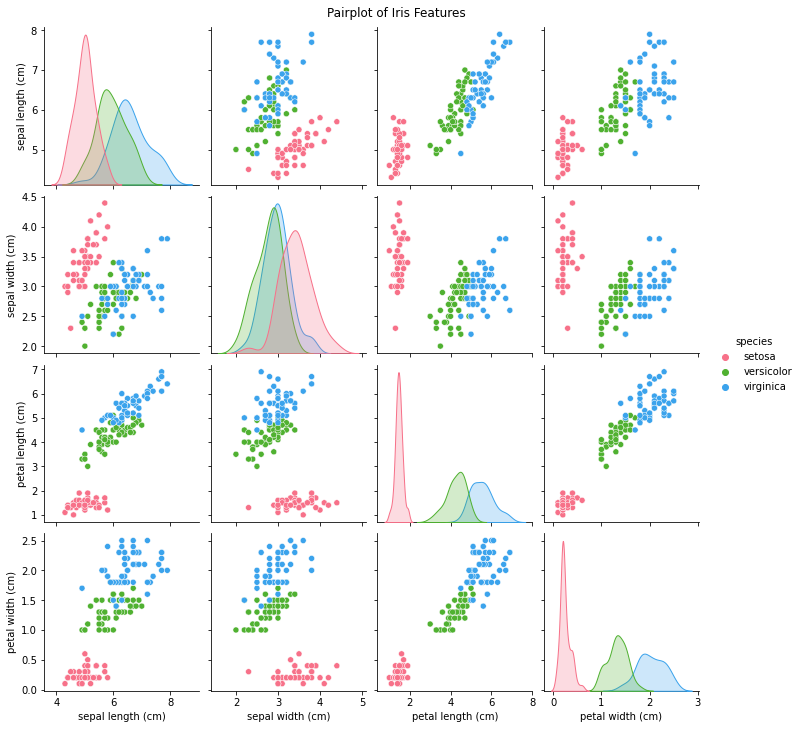

In [61]:
# pairplot to see all features plotted by species
plot = seaborn.pairplot(iris_data, hue='species', palette='husl').fig.suptitle('Pairplot of Iris Features', y=1.01)
plt.show()

## Data pre-processing code: Feature Ranking

<b><em> rank_features_FDR() </b></em>is an algorithm I developed that calculates the Fisher Discriminant Ratio (FDR) for each feature of each class and then outputs a value, then returns a sorted list of the features.
Time complexity: $O(n^2)$ depending on the number of classes and features in the dataframe</li></ol>

<b><em> rank_features_RFC() </b></em>is a Random Forest Classifer (RFC) is a Machine Learning (ML) algorithm based on Leo Breiman's “Random Forests” paper. This function returns an array of values between 0 and 1 for each feature; the values of this array sum to 1. The concept is that there are a 'forest' of decision trees created used to create a fit using random sample sizes from the given data set.

Reference: Breiman, “Random Forests”, Machine Learning, 45(1), 5-32, 2001.

In [166]:
# fisher discriminant ratio ranking is good for looking at separability between classes
def rank_features_FDR(dataframe, label):
    """
    :param dataframe: pandas dataframe
    :param label: label is an int, it's the column number that represents the classifier of the data
    :return: pandas dataframe sorted in descending order with columns: Feature, FDR Ranking Value
    time complexity: O(n^2) + C depending on the number of classes and features in the dataframe
    """
    # create list of the classes from the label; needs to be passed as a string, will not work for a col index
    classes = dataframe[label].unique()
    class_dataframes = []

    # create subsets for each class in the dataframe param; append to class_dataframes array
    for cls in classes:
        # first case is if the classes in the label are string names
        if type(cls) is str:
            class_dataframes.append(dataframe[dataframe[label].str.contains(str(cls))])
        # second case is if the classes in the label are integers
        elif type(label) is str:
            class_name = str(cls)
            class_dataframes.append(dataframe[dataframe[label]==int(class_name)])
    class_count = len(classes)

    # get all features from dataframe minus label
    features = []
    for column in dataframe:
        features.append(column)

    # drop label column from dataframe
    features.remove(label)

    # create series for rankings
    rankings_df = pandas.DataFrame(columns=['Feature', 'FDR Ranking Value'])

    # calculate FDR of each feature for each class
    for feature in features:
        FDR = 0
        # compare each class with the next for the current feature
        for index in range(class_count):
            # hit the last class; compare to first class
            if index == class_count - 1:
                first_cls = class_dataframes[0]
                last_cls = class_dataframes[index]
                FDR = FDR + ((first_cls[feature].mean() - last_cls[feature].mean())**2
                             / (first_cls[feature].std()**2 + last_cls[feature].std()**2))
            # first class through second to last class
            else:
                curr_cls = class_dataframes[index]
                next_cls = class_dataframes[index + 1]
                FDR = FDR + ((curr_cls[feature].mean() - next_cls[feature].mean()) **2
                             / (curr_cls[feature].std()**2 + next_cls[feature].std()**2))
        rankings_df = rankings_df.append({'Feature':feature, 'FDR Ranking Value':FDR}, ignore_index=True)

    # sort in descending order so most important feature is at the top
    rankings_df.sort_values(by='FDR Ranking Value', ascending=False, inplace=True)
    rankings_df.reset_index(inplace=True, drop=True)
    return rankings_df


def rank_features_RFC(dataframe, label):
    """
    ranks a given set of features given as a dataframe; specify the label to rank by
    :param dataframe: pandas dataframe
    :param label: label is a string, it should be how we are classifying our data (ex: iris 'species')
    :return: pandas dataframe sorted in descending order with columns: Feature, RFC Ranking Value
    resource used: https://www.kaggle.com/dkim1992/feature-selection-ranking
    """
    # x-axis will be all features so we will drop the label
    x = dataframe.drop(label, axis=1)
    # y-axis is the label for the data analysis
    y = dataframe[label]

    # create a random forest for the data set for features of the label then add the feature_importance
    # importance of each to an array
    classifier = RandomForestClassifier().fit(x, y)
    rankings = []
    for index in range(len(x.columns)):
        rankings.append([x.columns[index], classifier.feature_importances_[index]])
    rankings_df = pandas.DataFrame(np.array(rankings), columns=['Feature', 'RFC Ranking Value'])\
        .sort_values(by='RFC Ranking Value', ascending=False)
    rankings_df.reset_index(inplace=True, drop=True)
    return rankings_df

# Feature Ranking Results


### Here we see the top 2 features are petal length and petal width. Based on the Fisher Discriminant Ratio (FDR) scores, they are by far the most prominent. However since we only use 3 of the 4 to visualize them it would help explain a majority of the variance between classes, thus making it easy to use a machine learning algorithm to classify the data.

In [167]:
print('\nFeature Ranking using Fisher Discriminant Ratio')
rank_features_FDR(iris_data, 'species')


Feature Ranking using Fisher Discriminant Ratio


,Feature,FDR Ranking Value
0,petal length (cm),84.342979
1,petal width (cm),64.119910
2,sepal length (cm),7.582274
3,sepal width (cm),2.825609


In [168]:
print('\nFeature Ranking using Random Forest Classifer')
rank_features_RFC(iris_data, 'species')


Feature Ranking using Random Forest Classifer


,Feature,RFC Ranking Value
0,petal width (cm),0.49915446984719536
1,petal length (cm),0.37723952491174273
2,sepal length (cm),0.09921102375783018
3,sepal width (cm),0.024394981483231867


## Data pre-processing Code: Outlier Removal

<b><em> get_mahalanobis_distance() </b></em>is an algorithm I developed that calculates the mahalanobis distance of each observation from a given dataframe. Below is the equation for calculating the mahalanobis distance for each observation is $D_{i}=((x_{i}-\mu)\sum{}^{-1}(x_{i}-\mu)^T)^{1/2}$

<ul><li>Time complexity: $O(n^2)$ depending on the number of classes and features in the dataframe</li></ul>

<br>

<b><em> get_outliers() </b></em>is a an algorithm that uses the z-scores of the mahalanobis distance to remove outliers from the dataset. There is an optional parameter that allows outliers to be removed sequentially which re-calculates the z-scores each time an observation is removed. The default z-score threshold used is 2 because for the iris datset the data is already pretty normalized so in order to identify multiple outliers per class lowering the threshold from the standard of 3 is required.

<ul><li>Time complexity: $O(n)$ depending on the number of classes and features in the dataframe</li></ul>


In [196]:
# return mahalanobis distance for all observations in the given dataset based on the provided label/target column
def get_mahalanobis_distance(dataframe, label=None):
    """
    :param dataframe: pandas dataframe for a class of data
    :param label: label of the dataframe
    :return: returns the mahalnobis distance for all observations in the dataframe
    time complexity: O(n^2)
    """
    # drop label to only take numeric data
    data = dataframe.drop(label, axis=1)

    # make a copy of original dataframe and calculate individual pieces of equation
    x = pandas.DataFrame(data)
    x_mu = x - np.mean(data)
    data_cov = np.cov(data.values.T)
    inv_cov = np.linalg.inv(data_cov)
    part1 = np.dot(x_mu, inv_cov)

    # equation returns mahal_distance^2 so take diagonal to get mahalanobis distance
    mahal_distance = np.dot(part1, x_mu.T).diagonal()
    return mahal_distance

# get the zscore of the given column
def get_z_scores(dataframe, column):
    """
    :param dataframe: pandas dataframe to pass in
    :param column: column to calculate z-score on
    :return: an array of z-scores
    """
    zscores = []
    for index, row in dataframe.iterrows():
            zscores.append(abs(float((row.loc[column] - dataframe[column].mean()) / dataframe[column].std())))
    return zscores


def get_outliers(dataframe, label, threshold=None, sequential_removal=False):
    """
    :param dataframe: pandas dataframe; gets outliers from a single class
    :param label: label for the dataframe; i.e. - class of dataset which will not be considered in the outlier removal
    :param threshold: z-score threshold (default is 2 if not provided)
    :return: pandas dataframe of outlier observations from original dataframe
    """
    # convert threshold to floating point
    if threshold is None:
        threshold = float(2)
    else:
        threshold = float(threshold)

    # calculate mahalanobis distance of given dataframe
    data_copy = pandas.DataFrame(dataframe)
    data_copy.loc[:, 'mahalanobis_distance'] = get_mahalanobis_distance(dataframe, label)

    # get z-scores for mahalanobis distance; sort on z-scores decreasing
    data_copy.loc[:, 'zscores'] = get_z_scores(dataframe, 'mahalanobis_distance')
    data_copy = data_copy.sort_values(by='zscores', ascending=False)

    # return outliers based on z-score of mahalanobis distance of all features in dataframe
    outliers = pandas.DataFrame(columns=data_copy.columns)
    if sequential_removal:
        for index, row in data_copy.iterrows():
            if row['zscores'] > threshold:
                # add outlier to new dataframe and delete from existing
                outliers = outliers.append(row)
                data_copy.drop(index, inplace=True)
                # recalculate z-scores
                data_copy['zscores'] = get_z_scores(data_copy, 'mahalanobis_distance')
            else:
                break
    else:
        outliers = data_copy[(data_copy['zscores'] > threshold)]
        
    # renames the label column values with '_outlier' added
    species_name = dataframe[label].unique()[0]
    outliers = outliers.assign(species=species_name + ' outlier')
    return outliers

# Analyzing the data for outliers

### Here are the all four features separated with species by color; these allow us to visualize the outliers within the dataset. First we normalize the dataset before analyzing the plots. All three of these plots are categorical plots which allow us to visualize the realtionship between variables/features.

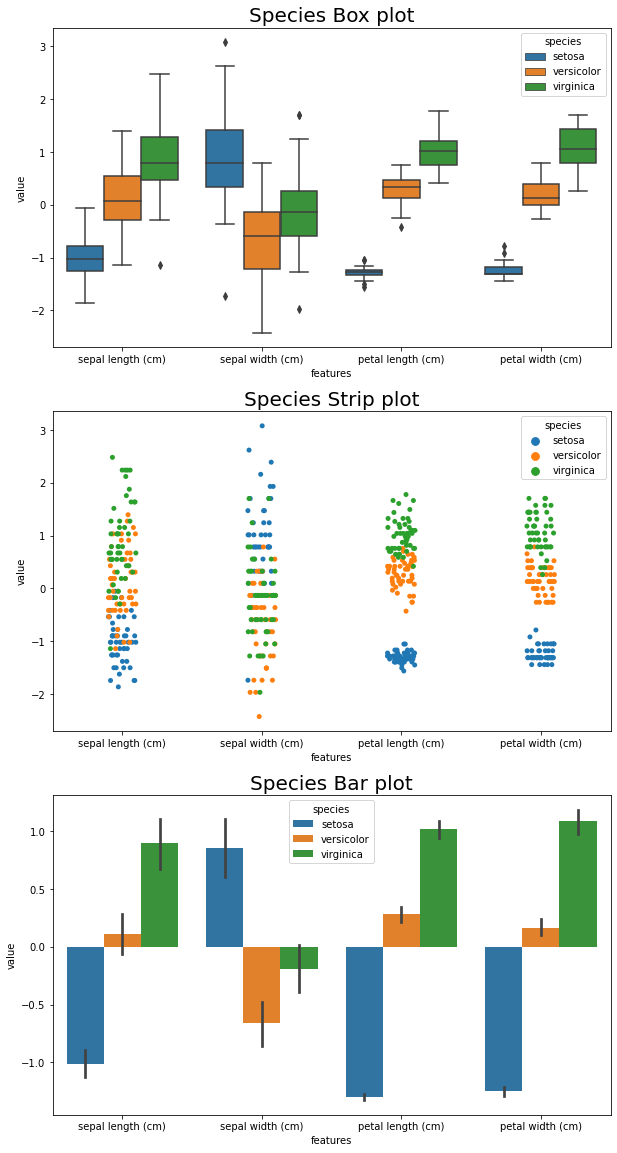

In [197]:
dataframe = iris_data
label = 'species'

x = dataframe.drop(label, axis=1) # x-axis will be all features so we will drop the label
y = dataframe[label] # y-axis is the label for the data analysis
data = x

# standardize the data using z-score standardization
data_normalized = (data - data.mean()) / (data.std())
data = pandas.concat([y, data_normalized], axis=1)
data = pandas.melt(data, id_vars=label, var_name='features', value_name='value')

fig, axs = plt.subplots(3, figsize=(10, 20))
seaborn.boxplot(x='features', y='value', hue=label, data=data, ax=axs[0])\
    .set_title(label.capitalize() + ' Box plot', fontsize=20)
seaborn.stripplot(x='features', y='value', hue=label, data=data, ax=axs[1])\
    .set_title(label.capitalize() + ' Strip plot', fontsize=20)
seaborn.barplot(x='features', y='value', hue=label, data=data, ax=axs[2])\
    .set_title(label.capitalize() + ' Bar plot', fontsize=20)    
plt.show()

# Identifying and extracting outliers within from the data

### Here we are doing scatterplots for each class that compare two features at a time. The outliers for each species are highlighted in the complimentary color of the species. Based on the findings from the section above we should pay more attention to petal length, petal, width, and sepal length which matches our finds from the other preprocessing step of feature ranking.

### The contour shapes around the points are generated using a kernel density estimator calculated for each class. This gives a visualization of the 'boundaries' for each class and where we would expect any additional observations added to the data set to be located. In other words, if we were given input data but no species for an observation we could plot the point and see if it falls inside a set of countour lines for a specific species.

## Outlier Detection using Two Features

### Using a z-score of 2 for the mahalanobis distance to get at least one outlier per class

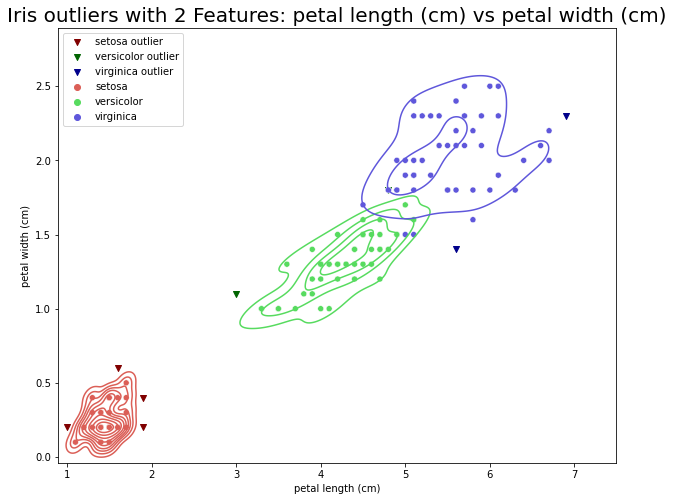

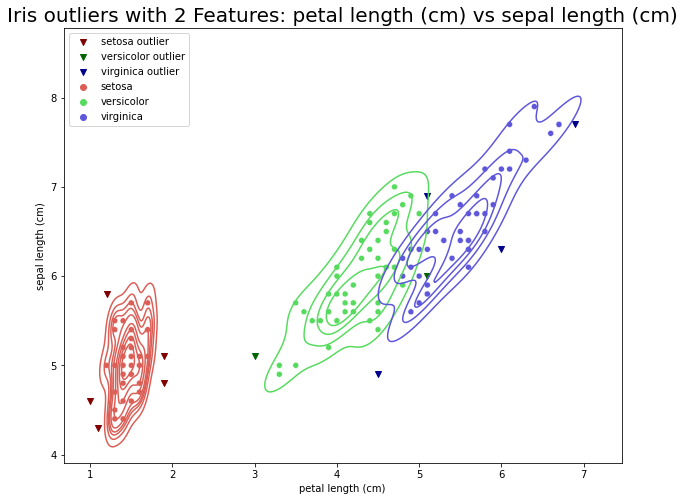

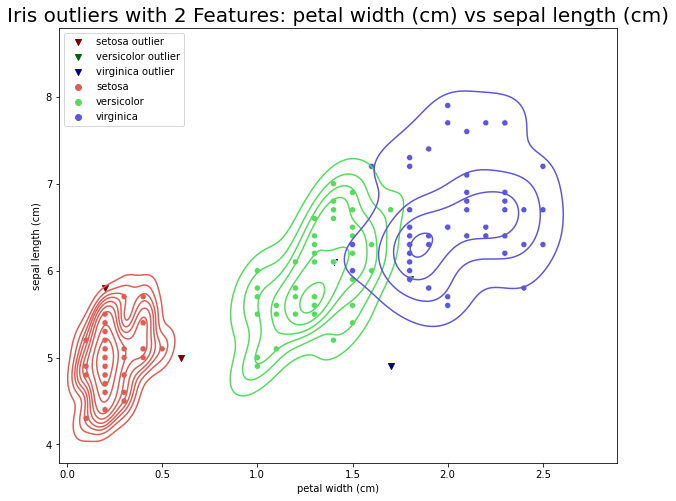

In [204]:
def kdeplot_2d_outliers(dataframe, label, x, y, title, spread=0.5, threshold=2):
    fig, ax = plt.subplots(figsize = (10,8))

    # extract outliers and plot them with different colors/markers
    classes = dataframe[label].unique()
    outlier_colors = ['maroon', 'darkgreen', 'darkblue']
    for index, cls in enumerate(classes):
        outliers = get_outliers(dataframe[dataframe[label].str.contains(cls)], label, threshold, True)
        outlier_name = outliers[label].unique()[0]
        ax.scatter(outliers[x], outliers[y], label=outlier_name, color=outlier_colors[index], marker='v')
        dataframe = dataframe[~dataframe.isin(outliers)].dropna()  # remove outliers from original dataframe

    # use gaussian kernel density estimator to produce contour lines for class boundaries
    seaborn.kdeplot(data=dataframe, x=dataframe[x], y=dataframe[y], palette='hls', hue=label, bw_method=spread, ax=ax)

    # plot all observations in the dataset
    seaborn.scatterplot(data=dataframe, x=dataframe[x], y=dataframe[y], palette='hls', hue=label, ax=ax)
    ax.legend()
    ax.set_title(title + ': ' +str(x) + ' vs ' + str(y), fontsize=20)
    plt.show()


# extract top 3 features
features = rank_features_FDR(iris_data, 'species')
feature_1, feature_2, feature_3 = features.loc[0][0], features.loc[1][0], features.loc[2][0]

# slimming dataset to just 2 features at a time for outlier detection and plotting
title = 'Iris outliers with 2 Features'
kdeplot_2d_outliers(iris_data[['species', feature_1, feature_2]], 'species', feature_1, feature_2, title)
kdeplot_2d_outliers(iris_data[['species', feature_1, feature_3]], 'species', feature_1, feature_3, title)
kdeplot_2d_outliers(iris_data[['species', feature_2, feature_3]], 'species', feature_2, feature_3, title)


## Outlier Detection using Three Features
### Using a z-score of 2.5 for the mahalanobis distance to get at least one outlier per class

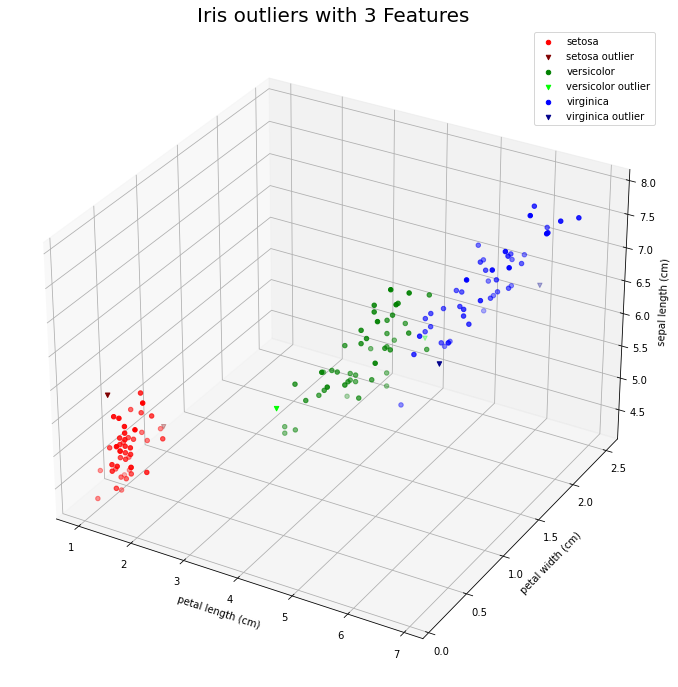

In [235]:
def scatter_3d_outliers(dataframes, label, x, y, z, title, colors, outlier_colors, threshold=2):
    """
    Parameters
    ----------
    dataframes: array of dataframes that will be plotted one at a time
    label: column that has the target class label
    x: x-axis; should be a string for the feature name
    y: y-axis; should be a string for the feature name
    z: z-axis; should be a string for the feature name
    colors: array of strings to be used as colors for original data points
    outlier_colors: array of strings to be used as colors for outlier data points
    threshold: z-score value for outlier threshold

    Returns
    -------
    3-d scatter plot with each class plotted as a different color, legend, and title

    """
    fig = plt.figure(figsize=(12, 12))
    ax = plt.axes(projection='3d')

    for index, cls in enumerate(dataframes):
        # extract outliers and remove from original dataframe
        cls_outliers = get_outliers(cls, label, threshold, sequential_removal=True)
        cls = cls[~cls.isin(cls_outliers)].dropna()

        # plot original data points
        names = cls[label].unique()
        name = names[0]  # jupyter did not want to accept a string array of size 1 for 'label' argument
        color = colors[index]
        ax.scatter3D(cls[x], cls[y], cls[z], label=name, c=color, marker='o')

        # plot outliers
        outlier_names = cls_outliers[label].unique()
        outlier_name = outlier_names[0]
        outlier_color = outlier_colors[index]
        ax.scatter3D(cls_outliers[x], cls_outliers[y], cls_outliers[z], label=outlier_name, c=outlier_color, marker='v')

    plt.title(title, fontsize=20)
    ax.set_xlabel(x), ax.set_ylabel(y), ax.set_zlabel(z)
    plt.legend()
    plt.show()


# regular data
setosa = iris_data[iris_data['species'].str.contains('setosa')]
versicolor = iris_data[iris_data['species'].str.contains('versicolor')]
virginica = iris_data[iris_data['species'].str.contains('virginica')]

# extract top 3 features
features = rank_features_FDR(iris_data, 'species')
feature_1, feature_2, feature_3 = features.loc[0][0], features.loc[1][0], features.loc[2][0]

# dataset slimmed to top 3 features
setosa_3d_data = setosa[['species', feature_1, feature_2, feature_3]]
versicolor_3d_data = versicolor[['species', feature_1, feature_2, feature_3]]
virginica_3d_data = virginica[['species', feature_1, feature_2, feature_3]]
iris_3d_data = [setosa_3d_data, versicolor_3d_data, virginica_3d_data]

# set colors and plot
colors=['red','green','blue']
outlier_colors=['maroon','lime','darkblue']
scatter_3d_outliers(iris_3d_data, 'species', feature_1, feature_2, feature_3,
                    'Iris outliers with 3 Features', colors, outlier_colors, 2.5)

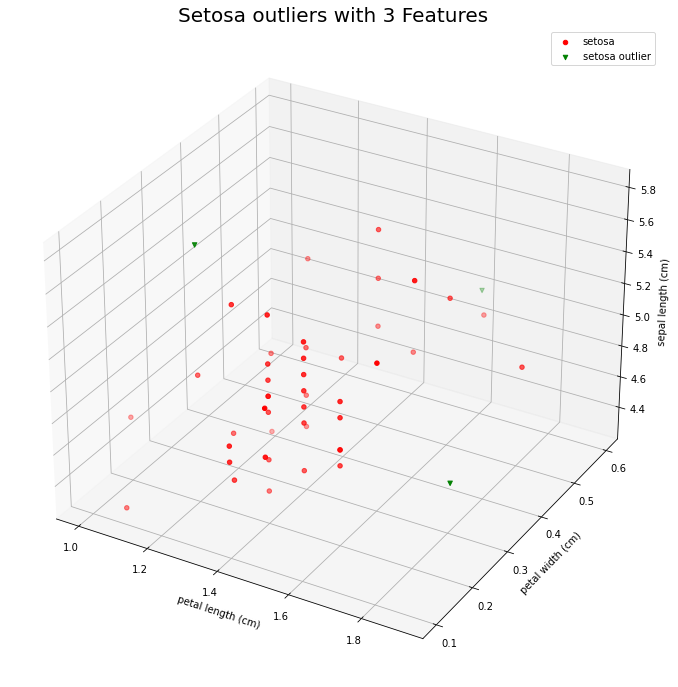

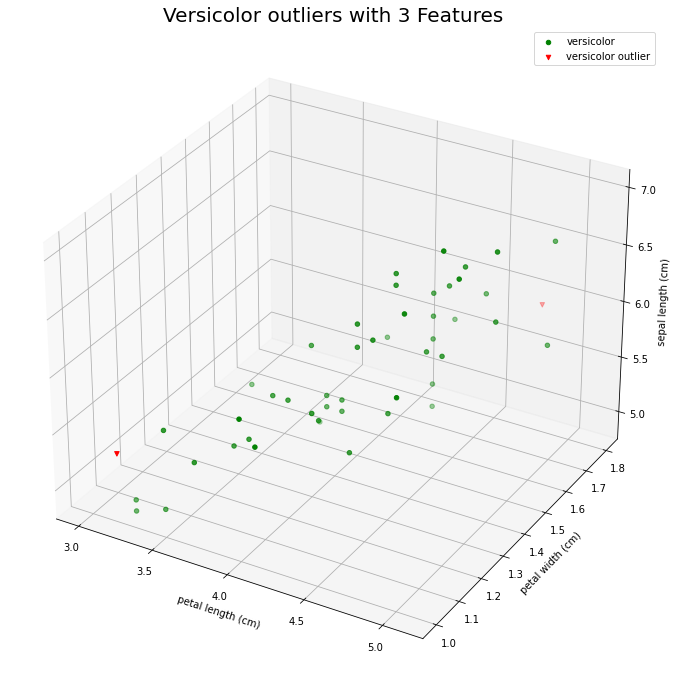

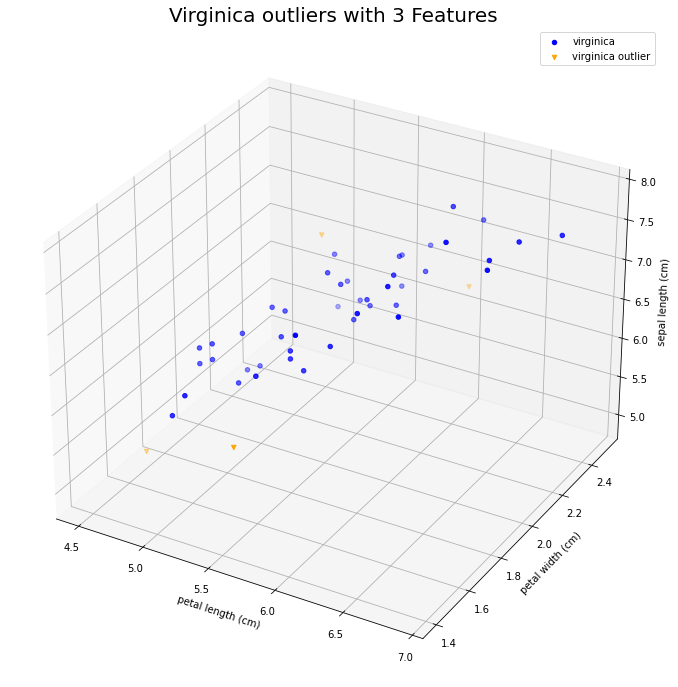

In [236]:
scatter_3d_outliers([setosa_3d_data], 'species', feature_1, feature_2, feature_3,
                    'Setosa outliers with 3 Features', [colors[0]],['green'], 2.5)
scatter_3d_outliers([versicolor_3d_data], 'species', feature_1, feature_2, feature_3,
                    'Versicolor outliers with 3 Features', [colors[1]],['red'], 2.5)
scatter_3d_outliers([virginica_3d_data], 'species', feature_1, feature_2, feature_3,
                    'Virginica outliers with 3 Features', [colors[2]],['orange'], 2.5)